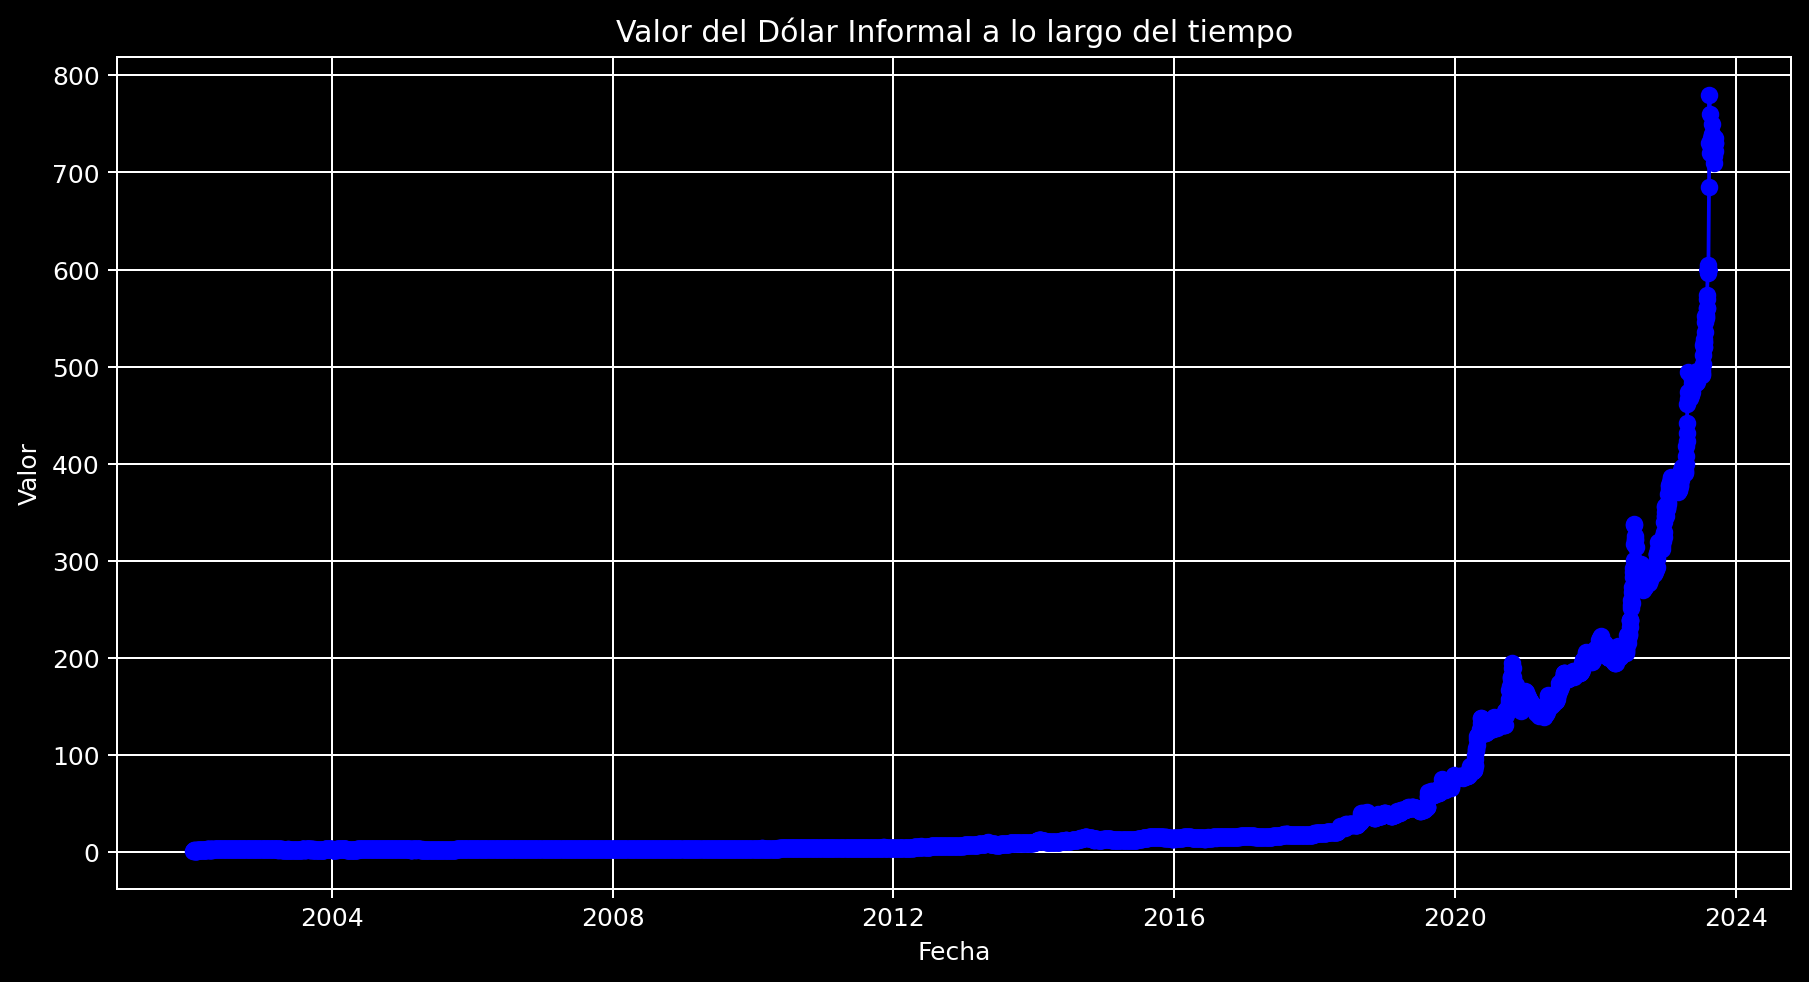

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Realizar la solicitud HTTP y cargar los datos en un DataFrame
url = 'https://mercados.ambito.com//dolar/informal/grafico/2000-03-21/2023-09-15'
resp = requests.get(url)
data = resp.json()[1:]
df = pd.DataFrame(data, columns=['Date', 'Blue'])

# Convertir la columna 'Date' a objetos de fecha
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extraer el día, el mes y el año de la fecha
df['Día'] = df['Date'].dt.day
df['Mes'] = df['Date'].dt.month
df['Año'] = df['Date'].dt.year

# Renombrar la columna 'Blue' a 'Valor'
df.rename(columns={'Blue': 'Valor'}, inplace=True)

# Crear un gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Valor'], marker='o', linestyle='-', color='b')
plt.title('Valor del Dólar Informal a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)
plt.show()
